PCA on the two recommended feature subsets.

In [1]:
from os import listdir
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import colors
mycmap = colors.ListedColormap(['red','blue'])  # list color for label 0 then 1

In [2]:
pathR='data/ChunkedData_R/'
pathN='data/ChunkedData_NR/'
filesR = listdir(pathR)
filesN = listdir(pathN)
filesR[0]

'Daily_2060_S3.csv'

In [3]:
# Read one CSV file. Drop the date column.
def file_mean (filepath):
    mydata = pd.read_csv(filepath)
    # Drop the date column.
    mydata = mydata.drop('Date',axis=1) 
    # Transpose column of mean values into a row.
    mymean = mydata.mean(axis=0).to_frame().T
    return mymean

In [4]:
# Read directory of CSV files. Retain only one row per file = column averages.
def mean_per_file (directory):
    files = listdir(directory)
    means = pd.DataFrame()
    for fp in files:
        dfp = directory+fp
        m = file_mean(dfp)
        # Let Pandas number the rows sequentially.
        means = means.append(m,ignore_index=True)
    return means

In [5]:
meansR = mean_per_file(pathR)
meansR.describe()

,Morning_Question1,Morning_Question2,Morning_Question3,Morning_Question4,Morning_Question5,Morning_Question6,Afternoon_Question1,Afternoon_Question2,Afternoon_Question3,Afternoon_Question4,...,HR_mean,HR_var,HR_std,HR_sk,HR_ku,Stress_mean,Stress_var,Stress_std,Stress_sk,Stress_ku
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2.771630,2.704766,3.684239,3.427975,2.393328,4.368998,3.686286,3.513472,2.736801,2.429426,...,79.327247,168.022421,12.358672,0.787483,0.662993,30.629987,449.669255,20.457643,0.917550,0.612431
std,1.339235,1.115521,1.206275,1.113369,0.893719,0.702195,1.221645,1.272435,1.147496,1.152266,...,3.769125,61.278871,2.289319,0.272895,0.669500,4.683535,105.003775,2.483785,0.268648,0.824843
min,1.000000,1.000000,1.000000,1.310345,1.517241,2.517241,1.000000,1.000000,1.000000,1.000000,...,74.539412,85.912121,9.195755,0.280961,-0.283663,23.014433,264.873317,15.284160,0.290027,-0.820974
25%,1.956981,2.169643,3.302760,2.539577,1.972222,3.958128,2.908279,3.087662,1.551724,1.310345,...,77.465143,104.751713,9.907677,0.591312,0.244217,28.117668,386.597363,18.933233,0.804227,0.240722
50%,2.857759,2.393939,3.928480,3.847222,2.064394,4.403941,4.000000,3.772727,3.000000,2.214286,...,78.904839,172.698871,12.686409,0.808753,0.448019,29.403302,442.825365,20.723560,0.986197,0.782005
75%,3.435737,3.758621,4.419540,4.000000,2.423701,4.979167,4.713362,4.326149,3.772727,3.607955,...,79.905215,214.698339,14.061540,1.040887,1.121867,32.695160,533.173782,22.052479,1.072589,0.855014
max,5.000000,4.448276,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.035714,3.962963,...,89.492347,258.342542,15.626514,1.102250,2.221792,39.126304,616.333657,24.128994,1.329738,2.395604


In [6]:
meansN = mean_per_file(pathN)
meansN.describe()

,Morning_Question1,Morning_Question2,Morning_Question3,Morning_Question4,Morning_Question5,Morning_Question6,Afternoon_Question1,Afternoon_Question2,Afternoon_Question3,Afternoon_Question4,...,HR_mean,HR_var,HR_std,HR_sk,HR_ku,Stress_mean,Stress_var,Stress_std,Stress_sk,Stress_ku
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2.982123,2.888846,4.235503,3.537182,2.198923,4.308005,4.279549,4.207332,3.086296,2.498761,...,76.611583,159.975591,11.960036,0.683127,0.560790,30.689241,401.670527,18.861560,0.781198,1.112729
std,1.295793,1.195432,0.749181,1.094154,1.225848,0.605677,0.759156,0.893941,1.475356,1.406318,...,5.441676,81.101585,2.960623,0.284105,0.898365,8.503527,182.846846,5.082146,0.532732,1.924766
min,1.000000,1.000000,2.241379,1.000000,1.000000,3.375000,2.655172,1.965517,1.000000,1.000000,...,67.782868,56.488793,7.377522,0.122072,-0.705049,14.546611,104.996084,9.509846,-0.290844,-1.149331
25%,1.648348,2.206897,4.000000,2.969109,1.086207,3.758621,3.612069,3.810345,1.140445,1.000000,...,72.879550,101.738931,9.844374,0.526519,-0.145713,27.099043,239.313772,14.858416,0.493503,-0.113687
50%,3.465517,3.155093,4.162835,3.885776,2.035714,4.275223,4.431034,4.362069,3.716236,2.379310,...,76.319784,129.058084,11.141028,0.696458,0.353699,30.683653,449.767037,20.611773,0.745404,0.254687
75%,3.982759,3.913793,4.965517,4.000000,3.017241,4.913793,5.000000,5.000000,4.000000,3.721675,...,79.833627,206.797720,13.810337,0.879722,1.252244,37.073748,534.976423,22.557086,1.016159,2.623001
max,4.931034,4.555556,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,87.654594,375.786266,18.950565,1.223495,2.095290,48.321463,738.938880,26.660994,1.915858,5.422677


In [7]:
meansAll = pd.concat((meansR,meansN),ignore_index=True)
meansAll.shape

(40, 259)

In [8]:
def make_labels(positives,negatives):
    rows = positives.shape[0]
    labelsP = pd.DataFrame(np.ones(rows,dtype=np.int8))  # one = blue
    rows = negatives.shape[0]
    labelsN = pd.DataFrame(np.zeros(rows,dtype=np.int8))  # zero = red
    labelsAll = pd.concat((labelsP,labelsN),ignore_index=True)
    return labelsAll

In [9]:
labelsAll = make_labels(meansR,meansN)
labelsAll.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def make_question_features(X,scale=True):
    c = X.columns[:13] # Excel columns B-N
    z = X[c]
    if scale:
        s = StandardScaler()
        z = s.fit_transform(z)
    return z
def make_physiol_features(X,scale=True):
    c = X.columns[249:] # Excel columns IQ-IZ
    z = X[c]
    if scale:
        s = StandardScaler()
        z = s.fit_transform(z)
    return z

In [11]:
X_questionFeatures = make_question_features(meansAll)
X_questionFeatures.shape

(40, 13)

In [12]:
X_physiolFeatures = make_physiol_features(meansAll)
X_physiolFeatures.shape

(40, 10)

In [13]:
def show_PC_variance_explained(X):
    pca = PCA(n_components=3) 
    pca.fit(X)
    e1,e2,e3=pca.explained_variance_ratio_[:3]*100.0
    print("PC1=%.2f%% PC2=%.2f%% PC3=%.2f%%"%(e1,e2,e3))
def plot_PCA (X,labels):  
    lims=[-5,5]  #  Use this if defaults don't work:   ax1d.set_xlim(lims)
    fig = plt.figure(figsize=(10,3))
    pca = PCA(n_components=3)  
    transformed=pca.fit_transform(X)
    pc1,pc2,pc3 = np.split(transformed,3,axis=1)
    # Plot first PC as histogram
    ax1d = fig.add_subplot(131)
    ax1d.set_title('First PC')
    ax1d.hist(pc1[:13],histtype='step',color='blue')  # TO DO: use iloc where label = 1
    ax1d.hist(pc1[13:],histtype='step',color='red')  # TO DO: use iloc where label = 0
    # Plot first 2 PCs in 2D. 
    ax2d = fig.add_subplot(132)
    ax2d.set_title('First 2 PCs')
    ax2d.scatter(pc1,pc2,c=labels,cmap=mycmap)
    # Plot first 3 PCs in 3D.
    ax3d = fig.add_subplot(133,projection='3d')
    ax3d.set_title('First 3 PCs')
    ax3d.scatter(pc1,pc2,pc3,c=labels,cmap=mycmap)
    # Output to screen.
    plt.show()

PCA of question feature space:
PC1=36.77% PC2=33.23% PC3=9.65%


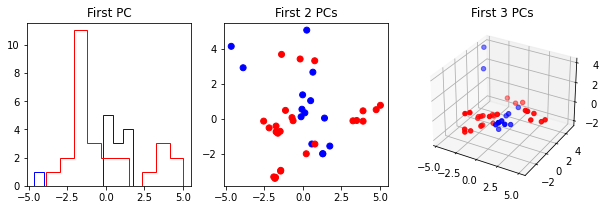

In [14]:
print("PCA of question feature space:")
show_PC_variance_explained(X_questionFeatures)
plot_PCA(X_questionFeatures,labelsAll)

PCA of physiol feature space:
PC1=51.34% PC2=22.66% PC3=13.49%


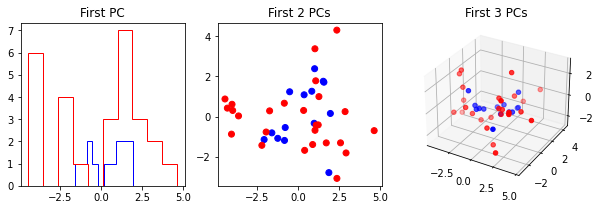

In [15]:
print("PCA of physiol feature space:")
show_PC_variance_explained(X_physiolFeatures)
plot_PCA(X_physiolFeatures,labelsAll)

PCA of total feature space:
PC1=67.77% PC2=12.20% PC3=5.97%


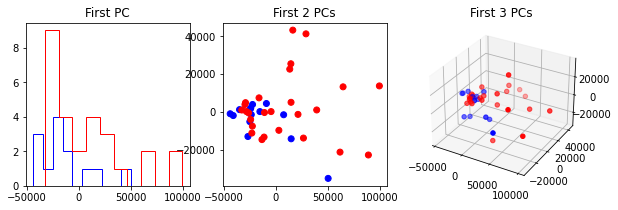

In [16]:
print("PCA of total feature space:")
show_PC_variance_explained(meansAll)
plot_PCA(meansAll,labelsAll)